<a href="https://colab.research.google.com/github/iamaarushi/ALY6110/blob/main/ALY6110_Aarushi_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns



In [3]:
# Data Import
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#total count
data.dtypes.value_counts()

float64    11
int64       3
Name: count, dtype: int64

In [5]:
#count of missing values in each column
missing_count = data.isnull().sum()

#percentage of missing values in each column
missing_percentage = (missing_count / len(data)) * 100

# Combine the missing count and percentage into a DataFrame
missing_info = pd.concat([missing_count, missing_percentage], axis=1)
missing_info.columns = ['missing_count', 'missing_percentage']

print(missing_info)

         missing_count  missing_percentage
crim                 0                 0.0
zn                   0                 0.0
indus                0                 0.0
chas                 0                 0.0
nox                  0                 0.0
rm                   0                 0.0
age                  0                 0.0
dis                  0                 0.0
rad                  0                 0.0
tax                  0                 0.0
ptratio              0                 0.0
b                    0                 0.0
lstat                0                 0.0
medv                 0                 0.0


In [6]:
#checking duplicate values in the dataset
data.duplicated().sum()

0

In [7]:
print(data.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [8]:
def map_function(row):
    rm_bins = ['3-4', '4-5', '5-6', '6-7', '7-8', '8-9']
    rm = row['rm']
    bin_index = min(max(int(rm) - 3, 0), len(rm_bins) - 1)
    return (rm_bins[bin_index], row['medv'])

In [9]:
# Apply the map function to the dataset
mapped_data = data.apply(map_function, axis=1).tolist()

In [10]:
def reduce_function(mapped_data):
    bin_stats = defaultdict(list)

    # Aggregate values by bin
    for bin, medv in mapped_data:
        bin_stats[bin].append(medv)

    # Calculate statistics for each bin
    results = []
    for bin, medv_list in bin_stats.items():
        count = len(medv_list)
        mean_medv = np.mean(medv_list)
        stddev_medv = np.std(medv_list)
        results.append((bin, count, mean_medv, stddev_medv))

    return results

In [11]:
# Reduce phase
reduced_data = reduce_function(mapped_data)



In [12]:
# Convert the reduced data to a DataFrame for easy visualization
results_df = pd.DataFrame(reduced_data, columns=['RM_Bin', 'Count', 'Mean_MEDV', 'StdDev_MEDV'])

# Sort the DataFrame by RM_Bin
results_df['RM_Bin'] = pd.Categorical(results_df['RM_Bin'], categories=['3-4', '4-5', '5-6', '6-7', '7-8', '8-9'], ordered=True)
results_df = results_df.sort_values('RM_Bin').reset_index(drop=True)

# Print the sorted DataFrame
print(results_df)

  RM_Bin  Count  Mean_MEDV  StdDev_MEDV
0    3-4      2  25.300000     2.200000
1    4-5     13  16.023077    10.514616
2    5-6    158  17.487342     5.335702
3    6-7    269  22.015985     6.455689
4    7-8     51  36.917647     8.234426
5    8-9     13  44.200000     7.774910


<ipython-input-14-1d6d15b23494>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RM_Bin", y="Mean_MEDV", data=results_df, palette="viridis")


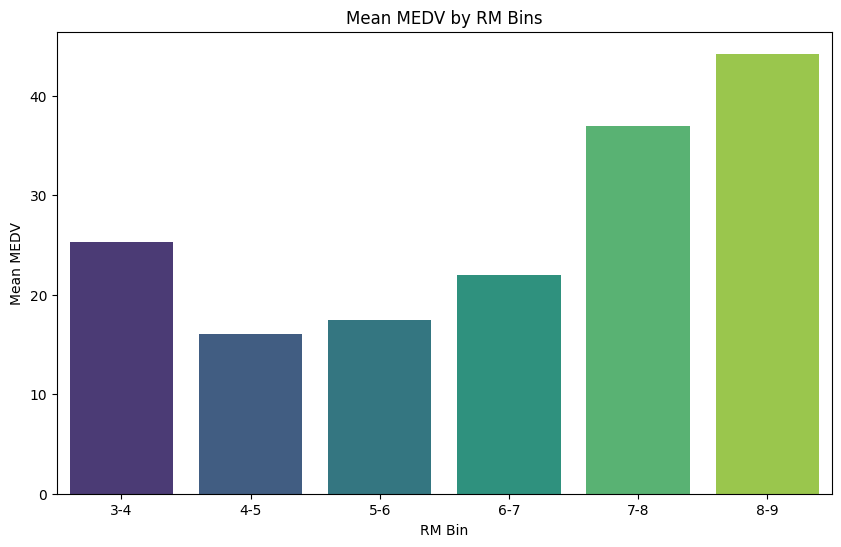

In [14]:
# Bar chart for Mean_MEDV
plt.figure(figsize=(10, 6))
sns.barplot(x="RM_Bin", y="Mean_MEDV", data=results_df, palette="viridis")
plt.title("Mean MEDV by RM Bins")
plt.xlabel("RM Bin")
plt.ylabel("Mean MEDV")
plt.show()


<ipython-input-15-f9c52800784a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RM_Bin", y="Count", data=results_df, palette="viridis")


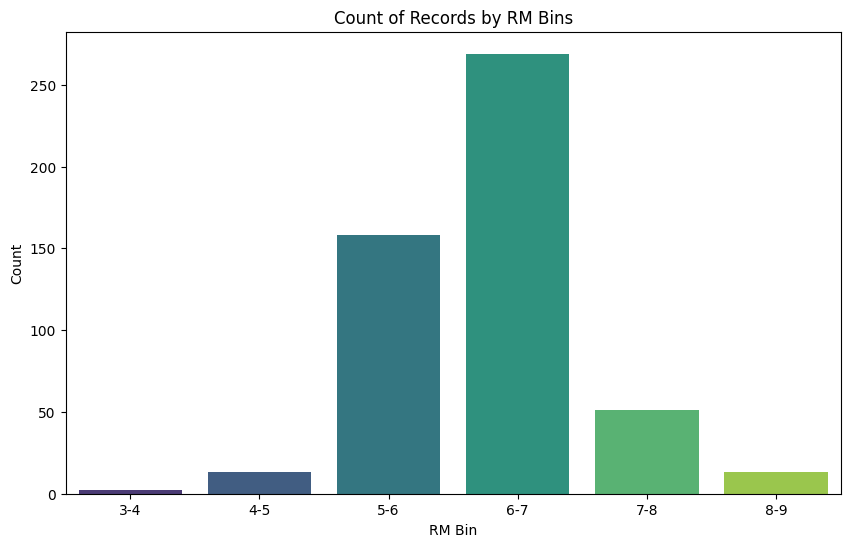

In [15]:
# Bar chart for Count
plt.figure(figsize=(10, 6))
sns.barplot(x="RM_Bin", y="Count", data=results_df, palette="viridis")
plt.title("Count of Records by RM Bins")
plt.xlabel("RM Bin")
plt.ylabel("Count")
plt.show()